<a href="https://colab.research.google.com/github/guilherminog/Desafios-DNC/blob/main/desafio4_Guilhermino_Gomes_Luis_Junior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Construindo um modelo de Regressão para marketing**


**Notebook referênte ao desafio 4 do curso de Ciência e Engenharia de Dados da escola DNC.**

## Imports

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import ipywidgets as widgets
from IPython.display import display

import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

## Dataset

In [6]:
df = pd.read_csv(r'/content/MKT.csv')

## Load Data


In [55]:
df.head()

,Investimento em YouTube,Investimento em Facebook,Investimento em Jornal,Vendas
0,0.236388,0.322581,0.402584,0.350394
1,0.988164,0.570565,0.426441,0.779528
2,0.379439,0.350806,0.380716,0.405512
3,0.326344,0.030242,0.295229,0.314961
4,0.895840,0.403226,0.000000,0.622047


In [8]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


## EDA

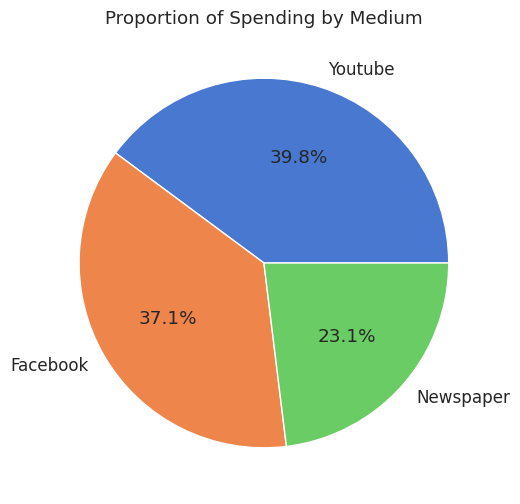

In [49]:
# @title Proportion of Spending by Medium
total_youtube = df['youtube'].sum()
total_facebook = df['facebook'].sum()
total_newspaper = df['newspaper'].sum()

proportions = [total_youtube, total_facebook, total_newspaper]
labels = ['Youtube', 'Facebook', 'Newspaper']

plt.figure(figsize=(8, 6))
plt.pie(proportions, labels=labels, autopct='%1.1f%%')
_ = plt.title('Proportion of Spending by Medium')

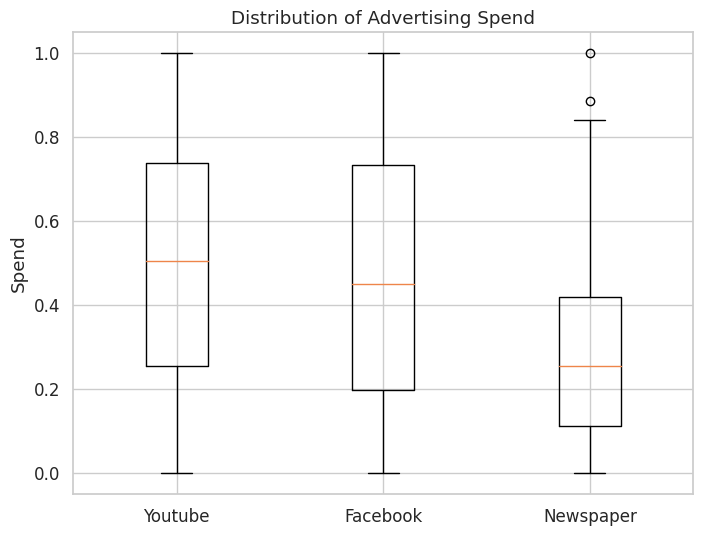

In [50]:
# @title Distribution of Advertising Spend
plt.figure(figsize=(8, 6))
plt.boxplot([df['youtube'], df['facebook'], df['newspaper']], labels=['Youtube', 'Facebook', 'Newspaper'])
plt.ylabel('Spend')
_ = plt.title('Distribution of Advertising Spend')


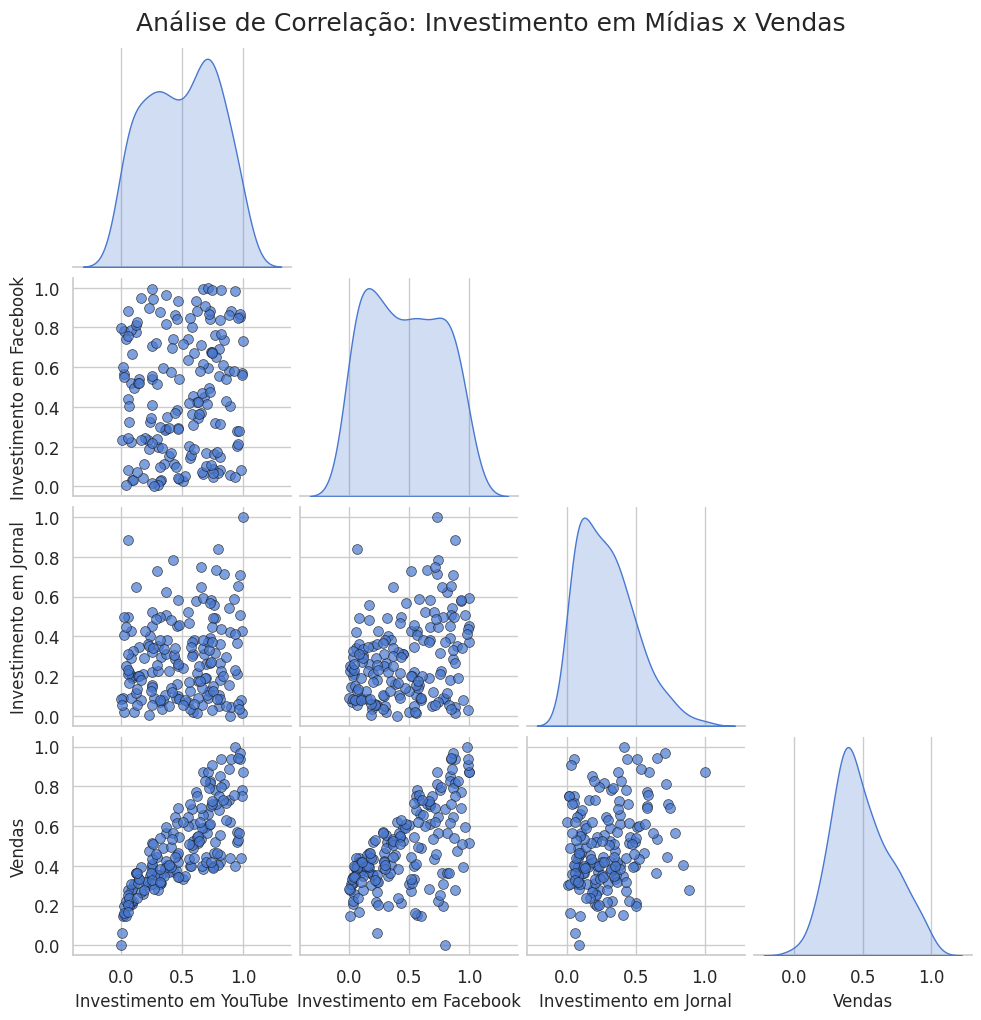

In [54]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

df = df.rename(columns={
    'youtube': 'Investimento em YouTube',
    'facebook': 'Investimento em Facebook',
    'newspaper': 'Investimento em Jornal',
    'sales': 'Vendas'
})

# Criando o pairplot com melhorias
pairplot = sns.pairplot(df,
                        corner=True,
                        diag_kind="kde",
                        plot_kws={'alpha': 0.7, 's': 50, 'edgecolor': 'k'},
                        diag_kws={'fill': True},
                        markers="o")

# Ajustando os títulos e rótulos
pairplot.fig.suptitle("Análise de Correlação: Investimento em Mídias x Vendas", y=1.02, fontsize=18)

# Ajustando os rótulos dos eixos em cada gráfico
for ax in pairplot.axes.flatten():
    if ax is not None:
        ax.set_xlabel(ax.get_xlabel(), fontsize=12)
        ax.set_ylabel(ax.get_ylabel(), fontsize=12)


plt.show()


In [11]:
df.corr().round(2)

,youtube,facebook,newspaper,sales
youtube,1.00,0.09,0.11,0.78
facebook,0.09,1.00,0.29,0.60
newspaper,0.11,0.29,1.00,0.25
sales,0.78,0.60,0.25,1.00


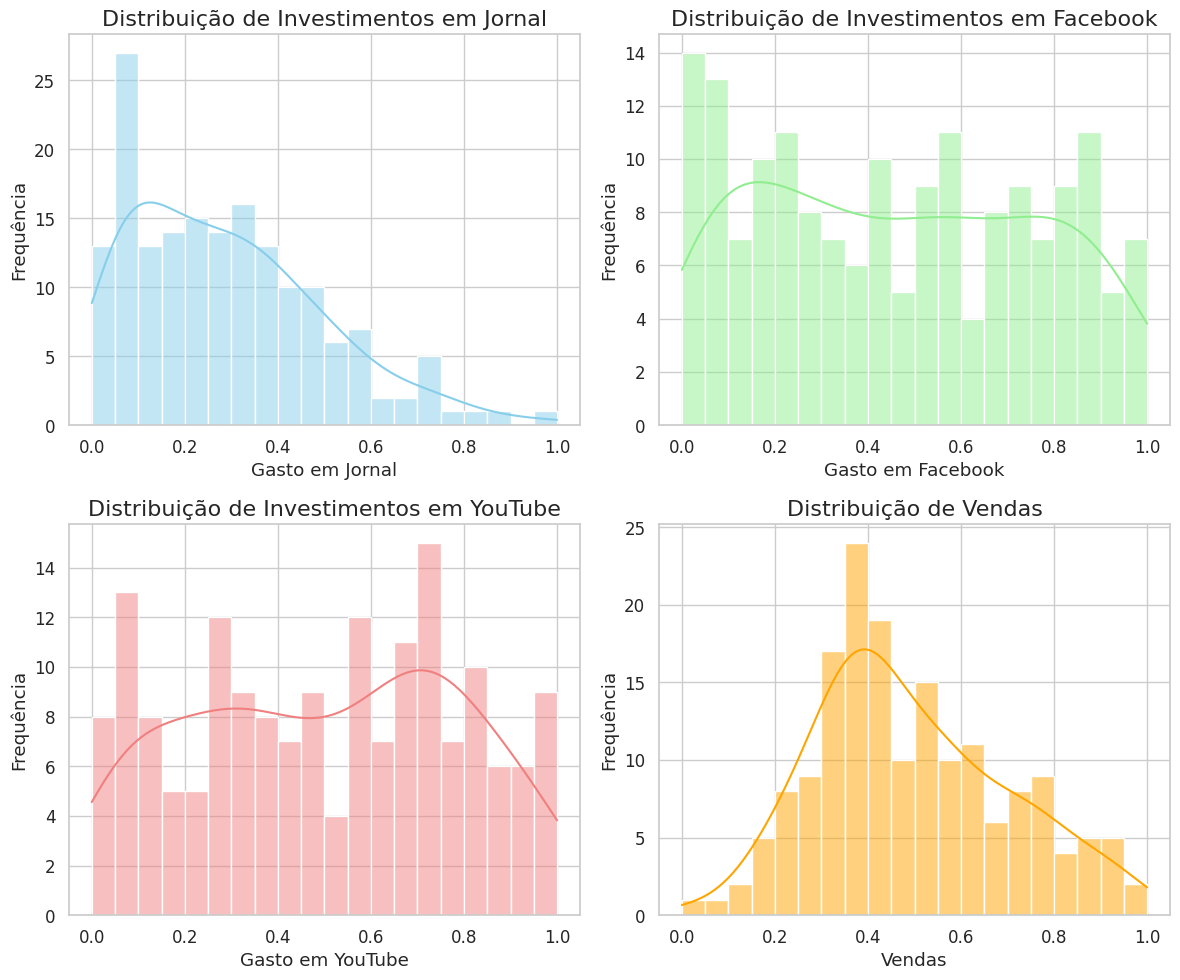

In [30]:
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df, x='newspaper', bins=20, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Distribuição de Investimentos em Jornal', fontsize=16)
axes[0, 0].set_xlabel('Gasto em Jornal')
axes[0, 0].set_ylabel('Frequência')
axes[0, 0].grid(True)

sns.histplot(df, x='facebook', bins=20, kde=True, color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Distribuição de Investimentos em Facebook', fontsize=16)
axes[0, 1].set_xlabel('Gasto em Facebook')
axes[0, 1].set_ylabel('Frequência')
axes[0, 1].grid(True)

sns.histplot(df, x='youtube', bins=20, kde=True, color='lightcoral', ax=axes[1, 0])
axes[1, 0].set_title('Distribuição de Investimentos em YouTube', fontsize=16)
axes[1, 0].set_xlabel('Gasto em YouTube')
axes[1, 0].set_ylabel('Frequência')
axes[1, 0].grid(True)

sns.histplot(df, x='sales', bins=20, kde=True, color='orange', ax=axes[1, 1])
axes[1, 1].set_title('Distribuição de Vendas', fontsize=16)
axes[1, 1].set_xlabel('Vendas')
axes[1, 1].set_ylabel('Frequência')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

## Modeling

In [16]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), index = df.index, columns = df.columns)

In [17]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,0.499327,0.464912,0.288933,0.492218
std,0.288721,0.300967,0.206287,0.207172
min,0.000000,0.000000,0.000000,0.000000
25%,0.254312,0.196573,0.110835,0.348425
50%,0.504227,0.449597,0.254473,0.444882
75%,0.738755,0.733871,0.418489,0.620079
max,1.000000,1.000000,1.000000,1.000000


In [31]:
y = df['sales']
X = df[['youtube', 'facebook']]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
Y_pred = lr.predict(X_test)

## Predict Model

In [36]:
r = r2_score(y_test, Y_pred)

In [37]:
print("r_quadrado:", r)

r_quadrado: 0.8728894133434414


In [45]:
youtube = 200
facebook = 100
entrada = [[youtube,facebook]]
lr.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


140.91201876099112

## Utilizando dropdown

In [44]:
options = ['youtube', 'facebook', 'newspaper']

dropdown1 = widgets.Dropdown(
    options=options,
    value=None,
    description='Primeira:',
    disabled=False,
)

dropdown2 = widgets.Dropdown(
    options=options,
    value=None,
    description='Segunda:',
    disabled=False,
)

# Campos numéricos para inserir os valores de cada variável
input1 = widgets.FloatText(
    value=0,
    description='Valor 1:',
    disabled=False
)

input2 = widgets.FloatText(
    value=0,
    description='Valor 2:',
    disabled=False
)

# Botão para submeter o formulário
submit_button = widgets.Button(
    description='Prever',
    button_style='success'
)

# Função para atualizar o segundo dropdown com base na seleção do primeiro
def update_dropdown2(*args):
    available_options = [option for option in options if option != dropdown1.value]
    dropdown2.options = available_options
    if dropdown2.value not in available_options:
        dropdown2.value = None

dropdown1.observe(update_dropdown2, 'value')

# Função que será chamada ao clicar no botão
def on_submit(b):
    # Captura as seleções dos dropdowns e os valores inseridos
    feature1 = dropdown1.value
    feature2 = dropdown2.value
    value1 = input1.value
    value2 = input2.value

    # Organiza a entrada com base nas seleções dos dropdowns
    entrada = np.array([[value1, value2]])

    # Realiza a predição com o modelo
    prediction = lr.predict(entrada)[0]  # Certifique-se de que o modelo `lr` esteja carregado

    print(f"Predição: {prediction}")

submit_button.on_click(on_submit)

# Exibindo o formulário
display(dropdown1, dropdown2, input1, input2, submit_button)


Dropdown(description='Primeira:', options=('youtube', 'facebook', 'newspaper'), value=None)

Dropdown(description='Segunda:', options=('youtube', 'facebook', 'newspaper'), value=None)

FloatText(value=0.0, description='Valor 1:')

FloatText(value=0.0, description='Valor 2:')

Button(button_style='success', description='Prever', style=ButtonStyle())

Predição: 140.91201876099112


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
